# Мария Студеникина СТФИ-122
## Вариант 2
## Творческое задание

In [1]:
# Импорт библиотек для проведения расчетов
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MaxAbsScaler

In [3]:
# Импорт библиотек для визуализации
from matplotlib import pyplot as plt
#import seaborn as sns
from sklearn.metrics import roc_curve

In [3]:
# Импорт библиотек для текста
#from simple_colors import *

## Загрузка данных

In [5]:
# Загружаем данные из CSV файла
df = pd.read_csv("/Users/manya/Desktop/data/dz_2/mnist_small.csv")
# Пример данных
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Загружаем данные из SAS файла
all_images = np.loadtxt('/Users/manya/Desktop/data/dz_2/mnist_small.csv',\
delimiter=',', skiprows=1)[:,1:]
# Пример данных
print(all_images.shape)

(5999, 784)


Массив первого изображения выглядит так: 
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57

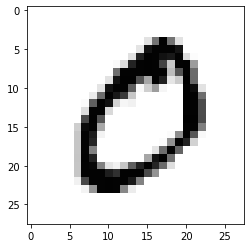

In [18]:
# Вывести массивное представление первого изображения
#print('\n', yellow('Массив первого изображения выглядит так:', 'bold'), '\n')
#print(all_images[0], '\n')

print("Массив первого изображения выглядит так:", '\n', all_images[0])

# Вывести первое изображение
#print('\n', yellow('Изображение выглядит как:', 'bold'))
plt.imshow(all_images[0].reshape(28,28),  cmap='Greys')
plt.show()

## Формирование признакового пространства

Данный набор данных содержит подмножество эталонного набора данных рукописных цифр MNIST. 5923 картинок 28x28 пикселей с изображением нуля и 76 картинок с изображением шестерки. 

Задача состоит в том, чтобы с использованием методов обучения без учителя для своего варианта (AE) построить одноклассовую модель на основе поиска аномалий, которая максимально хорошо отфильтрует шестерки (как аномалии) от нулей (как основной выборки). Признаки картинок описываются их координатами (в названии переменных, например «10x12») и значением яркости точки по этим координатам.

# Сформируем признаковое пространство:
# Целевая переменная: label. Описывает метку изображения: 0 (основная выборка) или 6 (аномалия)
# Остальные переменные - входные.

y = df["label"]
y[y > 0] = 1
X = df.loc[:, sorted(list(set(df.columns) - {"label"}))]

df_1 = df.copy()
scaler = StandardScaler()
df_1.values[:] = scaler.fit_transform(df_1)

X_2 = X.values[:]
#plt.scatter(X_2[:, 1], X_2[:, 1], c='blue')
plt.scatter(X_2, X_2, c='blue')

/home/disfavour/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4832010805335134

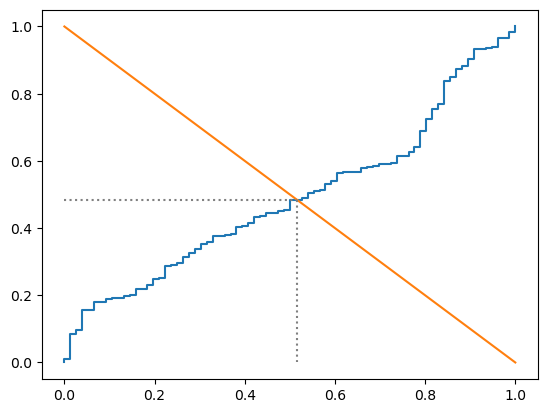

In [21]:
from sklearn.metrics import roc_curve


df_4 = pd.read_csv("mnist_small.csv")
df_4['label'] = df_4['label'].replace(6,1)
X = df_4.copy()
X = X.set_index("label")
X

model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=100, alpha=0.01, activation='tanh')
model.fit(X, X)

E = abs(X - model.predict(X))

ET = np.apply_along_axis(np.linalg.norm, 1, E)


rc = roc_curve(df_4["label"], ET, pos_label=1)
fpr, tpr, threshold = rc
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

plt.plot(tpr,fpr)
plt.plot([0,1], [1,0])
plt.plot([1-EER, 1-EER], [EER, 0],linestyle='dotted', color="grey") 
plt.plot([0,1-EER], [EER, EER], linestyle= 'dotted', color="grey")

EER

In [6]:


E = abs(X - model.predict(X))
E
#ET = np.apply_along_axis(np.linalg.norm, 1, E)

#X_anom = X[ET>pd.DataFrame(ET).quantile(q=0.95)[0]]


/home/disfavour/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,,,,,,,,,,,,,,,,,,,,,
0,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
0,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
0,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
0,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
0,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
1,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187
1,0.001112,0.000239,0.000074,0.000151,0.000531,0.000065,0.000057,0.001138,0.000089,0.000475,...,0.000876,0.000137,0.000425,0.000278,0.000373,0.000639,0.000456,0.000285,0.000509,0.00187


In [16]:
ET = np.apply_along_axis(np.linalg.norm, 1, E)
ET.shape

(5999,)

In [12]:
df_4["pred"] = ET
df_4["pred"]

0       1817.112949
1       1975.873525
2       2161.400398
3       2063.286493
4       2271.239543
           ...     
5994    2050.513533
5995    2204.894666
5996    2084.097525
5997    2336.491879
5998    1961.840656
Name: pred, Length: 5999, dtype: float64

In [9]:
df_4["label"]

0       0
1       0
2       0
3       0
4       0
       ..
5994    1
5995    1
5996    1
5997    1
5998    1
Name: label, Length: 5999, dtype: int64

In [18]:
from sklearn.metrics import roc_curve
rc = roc_curve(df_4["label"], df_4["pred"], pos_label=1)
fpr, tpr, threshold = rc
fpr

array([0.00000000e+00, 1.68833361e-04, 9.96116833e-03, 9.96116833e-03,
       8.35725139e-02, 8.35725139e-02, 9.60661827e-02, 9.60661827e-02,
       1.55495526e-01, 1.55495526e-01, 1.57690360e-01, 1.57690360e-01,
       1.79469863e-01, 1.79469863e-01, 1.79638697e-01, 1.79638697e-01,
       1.90444032e-01, 1.90444032e-01, 1.90781698e-01, 1.90781698e-01,
       1.92301199e-01, 1.92301199e-01, 1.99392200e-01, 1.99392200e-01,
       2.02262367e-01, 2.02262367e-01, 2.19145703e-01, 2.19145703e-01,
       2.19989870e-01, 2.19989870e-01, 2.31301705e-01, 2.31301705e-01,
       2.49198042e-01, 2.49198042e-01, 2.52574709e-01, 2.52574709e-01,
       2.87354381e-01, 2.87354381e-01, 2.90562215e-01, 2.90562215e-01,
       2.95627216e-01, 2.95627216e-01, 3.12848219e-01, 3.12848219e-01,
       3.25173054e-01, 3.25173054e-01, 3.39692723e-01, 3.39692723e-01,
       3.53199392e-01, 3.53199392e-01, 3.58602060e-01, 3.58602060e-01,
       3.75316563e-01, 3.75316563e-01, 3.76329563e-01, 3.76329563e-01,
      

In [19]:
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.4842140807023468

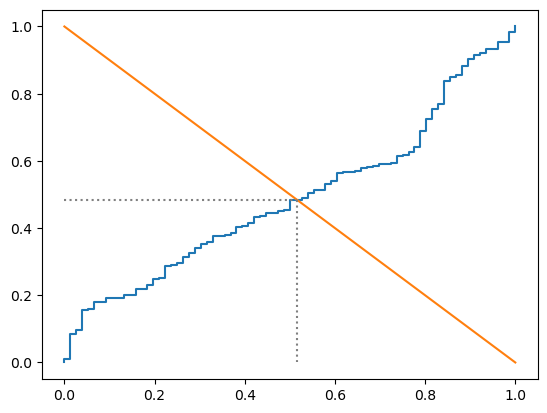

In [20]:
plt.plot(tpr,fpr)
plt.plot([0,1], [1,0])
plt.plot([1-EER, 1-EER], [EER, 0],linestyle='dotted', color="grey") 
plt.plot([0,1-EER], [EER, EER], linestyle= 'dotted', color="grey")

In [15]:
fpr.shape, tpr.shape, threshold.shape

((3,), (3,), (3,))

In [19]:
from sklearn.metrics import roc_curve
rc = roc_curve(df_4["label"], ET, pos_label=6)
fpr, tpr, threshold = rc
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

/Users/manya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: All-NaN slice encountered

In [ ]:
plt.plot(tpr,fpr)
plt.plot([0,1], [1,0])
plt.plot([1-EER, 1-EER], [EER, 0],linestyle='dotted', color="grey") 
plt.plot([0,1-EER], [EER, EER], linestyle= 'dotted', color="grey")

def rmlabel(dfc:pd.DataFrame):
    if 'label' in dfc.columns:
        df1 = dfc.drop(columns='label')
        df2 = dfc.label
        return df1,df2
    else:
        return dfc,0

def imshow(inp, title=None, plt_ax=plt, default=False):
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)
    plt_ax.axis('off')
    plt.set_cmap('gray')

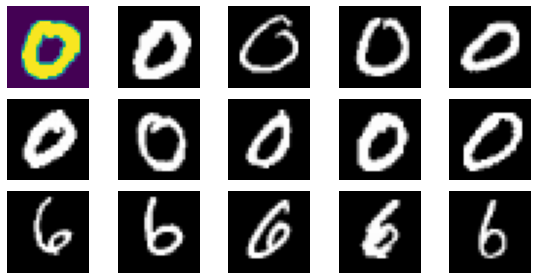

In [15]:
df_1 = df.copy()

sm = pd.concat([df_1[df_1['label'] == 0].sample(n=10),df_1[df_1['label'] == 6].sample(n=5)])
fig, ax = plt.subplots(nrows=3, ncols=5,figsize=(8, 4),sharey=True, sharex=True)
for id,fig_x in enumerate(ax.flatten()):
    imshow(np.array(sm.iloc[id][1:].values).reshape(28,-1),plt_ax=fig_x)
fig.tight_layout()
    

df1,df2 = rmlabel(df_1)
model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=100, alpha=0.01, activation='tanh')
clf = model.fit(df1, df1)

E = abs(df1 - model.predict(df1))
ET = np.apply_along_axis(np.linalg.norm, 1, E)

X_anom = df_1[ET>pd.DataFrame(ET).quantile(q=0.95)[0]]

X_Y2 = model.feature_names_in_
fpr, tpr, threshold = roc_curve(df.label, X_Y2, pos_label=6)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute(fnr - fpr))]

print(f'ERR = ({1 - EER:.4f},{EER:.4f})')
plt.plot(tpr, fpr)
plt.plot([0, 1], [1, 0])
plt.show()

dfn = df.join(pd.Series(model.feature_names_in_, name='tpr'))
print(dfn, 1 - EER)

df1, df2 = rmlabel(df_2)


kernel_pca = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, alpha=0.01, activation='tanh')

df_1 = df.copy()

df_1 = df_1.set_index("label")

scaler = StandardScaler()
df_1.values[:] = scaler.fit_transform(df_1)

kernel_pca = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, alpha=0.01, activation='tanh')

X_one = kernel_pca.fit(df_1, df_1)




E = abs(df_1-kernel_pca.predict(df_1))


ET = np.apply_along_axis(np.linalg.norm, 1, E)


ndf = df_1[ET>pd.DataFrame(ET).quantile(q=0.9)[0]]

print(type(ndf))

print(ndf[ndf["label"] == 6].shape[0] / 76)
print((76 - ndf[ndf["label"] == 6].shape[0] + ndf[ndf["label"] == 0].shape[0])/ 5999)

X_anom = df_1[ET>pd.DataFrame(ET).quantile(q=0.95)[0]]
X_anom_pca = X_one[ET>pd.DataFrame(ET).quantile(q=0.9)[0]]


plt.scatter(X_one[:, 0], X_one[:, 1], c=ET)
plt.scatter(X_anom_pca[:, 0], X_anom_pca[:, 1], c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection using Kernel PCA")
plt.show()

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [1, 0], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

ndf1 = ndf.copy()
ndf1["label_p"] = 0

df_2 = df_1.copy()
df_2["labelp"] = 0
tmp = df_2[ET>pd.DataFrame(ET).quantile(q=0.9)[0]]

for i in list(tmp.index):
    df_2.iloc[i]["labelp"] = 1

# y = df12["label"]
# y[y > 0] = 1

rc = metrics.roc_curve(df_2["label"], df_2["labelp"], pos_label=1)

fpr, tpr, threshold = rc
fnr = 1 - tpr
err_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

plt.plot(tpr, fpr)
plt.plot([0, 1], [1, 0])
plt.plot([1 - EER, 1 - EER], [EER, 0], linestyle="dotted", color="grey")
plt.plot([0, 1 - EER], [EER, EER], linestyle="dotted", color="grey")
plt.show()

X_2 = df_1.copy()

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, alpha=0.01, activation='tanh')
model.fit(X_2, X_2)

E = abs(X_2-model.predict(X_2))

ET=np.apply_along_axis(np.linalg.norm, 1, E)
X_anom = X_2[ET>pd.DataFrame(ET).quantile(q=0.95)[0]]

#plt.figure(figsize = (7, 4))
#plt. scatter (X_2[:, 0], X_2[:, 1], c=-ET)
#plt.scatter(X_anom[:, 0], X_anom[:, 1], c='red')
#plt.xlabel ('XI')
#plt.ylabel ('X2')
#plt.title('Simple autoencoder')

Данный код строит график ROC кривой вашей модели с референсной линией, соответствующей равным ошибкам первого и второго рода. 
На пересечении этих графиков и будет точка EER (Equal Error Rate) вашей модели, которую вам нужно будет улучшить. 
Обратите внимание на график, отметьте для себя точку пересечения графиков, соответствующую ERR вашей модели.

In [ ]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    eer = fpr[np.argmin(np.abs(1 - tpr - fpr))] # EER - абсцисса (FPR) точки пересечения двух графиков
    print(f'EER = {eer}')
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [1, 0], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, alpha=0.01, activation='tanh')
model.fit(X_one, X_one)



EER = 0.20006753334458888


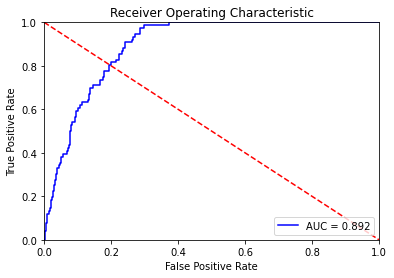

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df)
dist_clusters = df.apply(lambda x: min([np.linalg.norm(x - cl) for cl in kmeans.cluster_centers_]), axis = 1)
plot_roc_curve(y, dist_clusters)